# Import climate and buildings data 

In [31]:
from gurobipy import *
import time
import pandas as pd

In [32]:
hw85 = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp85\\hotdays.csv", delimiter=',' , header=None)
hr85 = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp85\\mediumrain.csv", delimiter=',' , header=None)
sp85=  pd.read_csv( r"C:\Users\NLLIST\OneDrive - Sweco AB\Thesis\Climate data\rcp85\sunpeak.csv", delimiter=' ' , header=None)

hw45 = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp45\\hotdays.csv", delimiter=',' , header=None)
hr45 = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp45\\mediumrain.csv", delimiter=',' , header=None)
sp45 =  pd.read_csv( r"C:\Users\NLLIST\OneDrive - Sweco AB\Thesis\Climate data\rcp45\sunpeak.csv", delimiter=' ' , header=None)

hw26 = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp26\\hotdays.csv", delimiter=',' , header=None)
hr26 = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp26\\mediumrain.csv", delimiter=',' , header=None)
sp26 =  pd.read_csv( r"C:\Users\NLLIST\OneDrive - Sweco AB\Thesis\Climate data\rcp26\sunpeak.csv", delimiter=' ' , header=None)

hw85IC = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp85-2\\hotdays.csv", delimiter=',' , header=None)
hr85IC = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp85-2\\mediumrain.csv", delimiter=',' , header=None)
sp85IC =  pd.read_csv( r"C:\Users\NLLIST\OneDrive - Sweco AB\Thesis\Climate data\rcp85-2\sunpeak.csv", delimiter=' ' , header=None)

hw45IC = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp45-2\\hotdays.csv", delimiter=',' , header=None)
hr45IC = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp45-2\\mediumrain.csv", delimiter=',' , header=None)
sp45IC =  pd.read_csv( r"C:\Users\NLLIST\OneDrive - Sweco AB\Thesis\Climate data\rcp45-2\sunpeak.csv", delimiter=' ' , header=None)

hw26IC = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp26-2\\hotdays.csv", delimiter=',' , header=None)
hr26IC = pd.read_csv( r"C:\\Users\\NLLIST\\OneDrive - Sweco AB\\Thesis\\Climate data\\rcp26-2\\mediumrain.csv", delimiter=',' , header=None)
sp26IC =  pd.read_csv( r"C:\Users\NLLIST\OneDrive - Sweco AB\Thesis\Climate data\rcp26-2\sunpeak.csv", delimiter=' ' , header=None)

In [33]:
#buildings 
pand = pd.read_csv(r"C:\Users\NLLIST\Desktop\Thesis\try6\Merged.csv")

In [34]:
pand.describe()

pandid           ig           cb           rg           rb  \
count  1.120000e+03  1120.000000  1120.000000  1120.000000  1120.000000   
mean   6.061000e+14     0.006192   265.491071     0.592735     0.421259   
std    6.550399e+03     0.024403   105.876190     0.180262     0.142423   
min    6.061000e+14     0.000000   200.000000     0.000000     0.000000   
25%    6.061000e+14     0.000000   200.000000     0.455846     0.309640   
50%    6.061000e+14     0.000352   200.000000     0.564605     0.403950   
75%    6.061000e+14     0.003171   350.000000     0.712001     0.504103   
max    6.061000e+14     0.371587   500.000000     1.000000     1.000000   

              _area           ry          AREA  
count   1120.000000  1120.000000    877.000000  
mean    1168.907379     0.645361    727.776511  
std     2097.225753     0.355074   1251.096492  
min        0.000000     0.000000     30.000000  
25%      235.808196     0.591281    181.750000  
50%      574.317823     0.837655    322.500000  
75%     1172.027171     0.888864    703.500000  
max    32953.665197     0.963716  15385.500000

## Read and modify data from pand

In [35]:
#Roofs
a=pand["_area"] # ROOFS' AREAS
roofs = range(len(a)) # SET OF ROOFS

#green
rg=pand["rg"] # HEAT MITIGATION POTENTIAL
ig=pand['ig'] 

#blue
rb=pand["rb"]

#yellow
ry = pand["ry"]

## Divide the climate input data into subsets based on year, so that the model can be reformulated with a time-changing budget

In [36]:
# green roofs can help for heat mitigation only if the temperature is not too high (31 deg) and is useful strarting from (25 deg)

hw85IC = hw85IC[(hw85IC[1] >=25) & (hw85IC[1] <=31)]
hw85IC= hw85IC.reset_index(drop=True) # indexing has to be updated in order to further process the vector

hw45IC = hw45IC[(hw45[1] >=25) & (hw45[1] <=31)]
hw45= hw45.reset_index(drop=True)

hw26= hw26[(hw26[1] >=25) & (hw26[1] <=31)]
hw26= hw26.reset_index(drop=True)

h85IC = h85IC[(h85IC >=25) & (h85IC <=31)]
h85IC= h85IC.reset_index(drop=True) # indexing has to be updated in order to further process the vector

h45IC = h45IC[(h45IC >=25) & (h45IC <=31)]
h45IC= h45IC.reset_index(drop=True)

h26IC= h26IC[(h26IC >=25) & (h26IC <=31)]
h26IC= h26IC.reset_index(drop=True)


<ipython-input-36-60843904127d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hw45IC = hw45IC[(hw45[1] >=25) & (hw45[1] <=31)]


In [92]:
# Extract only the year from the time column

hr85[0]=(hr85[0]).str.split('-').str[0]
hr45[0]=(hr45[0]).str.split('-').str[0]
hr26[0]=(hr26[0]).str.split('-').str[0]

hw85[0]=(hw85[0]).str.split('-').str[0]
hw45[0]=(hw45[0]).str.split('-').str[0]
hw26[0]=(hw26[0]).str.split('-').str[0]


hr85IC[0]=(hr85IC[0]).str.split('/').str[2]
hr45IC[0]=(hr45IC[0]).str.split('-').str[0]
hr26IC[0]=(hr26IC[0]).str.split('-').str[0]

hw85IC[0]=(hw85IC[0]).str.split('-').str[0]
hw45IC[0]=(hw45IC[0]).str.split('-').str[0]
hw26IC[0]=(hw26IC[0]).str.split('-').str[0]

In [41]:
# since the sun peak hours per day are reported without day, group by 365 to extract the total sun peak hours per year
sp85=sp85.set_index(sp85.index // 365.25).sum(level=0)
sp45=sp45.set_index(sp45.index // 365.25).sum(level=0)
sp26=sp26.set_index(sp26.index // 365.25).sum(level=0)

## Read and process climate-depending parameters

In [42]:
years=['2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030','2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045']

In [94]:
# Extract the lenght of heat and rain vectors for every year, so that it can be used later for for-loops

hlen85=[]
hlen45=[]
hlen26=[]
for t in years:
    hlen85.append(len(hw85.loc[hw85[0] == t]))
    hlen45.append(len(hw45.loc[hw45[0] == t]))
    hlen26.append(len(hw26.loc[hw26[0] == t]))
    
rlen85=[]
rlen45=[]
rlen26=[]
for t in years:
    rlen85.append(len(hr85.loc[hr85[0] == t]))
    rlen45.append(len(hr45.loc[hr45[0] == t]))
    rlen26.append(len(hr26.loc[hr26[0] == t]))    
    
hlen85IC=[]
hlen45IC=[]
hlen26IC=[]
for t in years:
    hlen85IC.append(len(hw85IC.loc[hw85IC[0] == t]))
    hlen45IC.append(len(hw45IC.loc[hw45IC[0] == t]))
    hlen26IC.append(len(hw26IC.loc[hw26IC[0] == t]))
    
rlen85IC=[]
rlen45IC=[]
rlen26IC=[]
for t in years:
    rlen85IC.append(len(hr85IC.loc[hr85IC[0] == t]))
    rlen45IC.append(len(hr45IC.loc[hr45IC[0] == t]))
    rlen26IC.append(len(hr26IC.loc[hr26IC[0] == t]))  
    

In [95]:
cb85IC=pand["cb"]/(1000*len(hr85IC)) 

In [45]:
#blue
# AVOIDED COSTS PER M3 OF WATER RETAINED, FOR EACH RAINFALL EVENT
cb85=pand["cb"]/(1000*len(hr85)) 
cb45=pand["cb"]/(1000*len(hr45))
cb26=pand["cb"]/(1000*len(hr26))
cb85IC=pand["cb"]/(1000*len(hr85IC)) 
cb45IC=pand["cb"]/(1000*len(hr45IC))
cb26IC=pand["cb"]/(1000*len(hr26IC))

#green

# IMPACTED PEOPLE PER BUILDING IS MODELED VIA ig AND RESCALED DEPENDING ON THE TEMPERATURE EVERY DAY
# WE ADD THE INDEX OF THE YEAR TO BE ABLE TO CALL IT LATER FOR EACH YEAR
m85 = [[[0 for j in range(max(hlen85)) ] for i in range(len(a))] for z in range(len(years))] 
m45 = [[[0 for j in range(max(hlen45))] for i in range(len(a))] for z in range(len(years))] 
m26 = [[[0 for j in range(max(hlen26))] for i in range(len(a))] for z in range(len(years))] 
m85IC = [[[0 for j in range(max(hlen85IC)) ] for i in range(len(a))] for z in range(len(years))] 
m45IC = [[[0 for j in range(max(hlen45IC))] for i in range(len(a))] for z in range(len(years))] 
m26IC = [[[0 for j in range(max(hlen26IC))] for i in range(len(a))] for z in range(len(years))] 

z=0
for t in years: 
    
    for i in roofs :
         for j in range(hlen85[z]) :
            m85[z][i][j]=ig[i]+(ig[i]/5)*(hw85.loc[hw85[0] == t][1].reset_index(drop=True)[j]-30) 
            
    
    for i in roofs:
         for j in range(hlen45[z]):
            m45[z][i][j]=ig[i]+(ig[i]/5)*(hw45.loc[hw45[0] == t][1].reset_index(drop=True)[j]-30) 
            
    
    for i in roofs:
         for j in range(hlen26[z]):
            m26[z][i][j]=ig[i]+(ig[i]/5)*(hw26.loc[hw26[0] == t][1].reset_index(drop=True)[j]-30) 
            
    for i in roofs :
         for j in range(hlen85IC[z]) :
            m85IC[z][i][j]=ig[i]+(ig[i]/5)*(hw85IC.loc[hw85IC[0] == t][1].reset_index(drop=True)[j]-30) 
            
    
    for i in roofs:
         for j in range(hlen45IC[z]):
            m45IC[z][i][j]=ig[i]+(ig[i]/5)*(hw45IC.loc[hw45IC[0] == t][1].reset_index(drop=True)[j]-30) 
            
    
    for i in roofs:
         for j in range(hlen26IC[z]):
            m26IC[z][i][j]=ig[i]+(ig[i]/5)*(hw26IC.loc[hw26IC[0] == t][1].reset_index(drop=True)[j]-30) 


    z=z+1



In [96]:
# the amount of rainfall is inserted in a matrix where each line represents a year

z=0   
r85=[[0 for j in range(max(rlen85))] for z in range(len(years)) ]
r45=[[0 for j in range(max(rlen45))] for z in range(len(years)) ]
r26=[[0 for j in range(max(rlen26))] for z in range(len(years)) ]
r85IC=[[0 for j in range(max(rlen85IC))] for z in range(len(years)) ]
r45IC=[[0 for j in range(max(rlen45IC))] for z in range(len(years)) ]
r26IC=[[0 for j in range(max(rlen26IC))] for z in range(len(years)) ]

for t in years: 
    
    for j in range(rlen85[z]):
        r85[z][j]=hr85.loc[hr85[0] == t][1].reset_index(drop=True)[j]
        

    for j in range(rlen45[z]):
        r45[z][j]=hr45.loc[hr45[0] == t][1].reset_index(drop=True)[j]
        
    
    for j in range(rlen26[z]):
        r26[z][j]=hr26.loc[hr26[0] == t][1].reset_index(drop=True)[j]
        
    for j in range(rlen85IC[z]):
        r85IC[z][j]=hr85IC.loc[hr85IC[0] == t][1].reset_index(drop=True)[j]
        

    for j in range(rlen45IC[z]):
        r45IC[z][j]=hr45IC.loc[hr45IC[0] == t][1].reset_index(drop=True)[j]
        
    
    for j in range(rlen26IC[z]):
        r26IC[z][j]=hr26IC.loc[hr26IC[0] == t][1].reset_index(drop=True)[j]
        
    z=z+1

## User parameters

In [49]:
cg= 5000
kb=0.8
kg=0.8
Q=187.5
theta= 0.05
hg=10
cy=0.0700734/1000

# Choose the budget: create a vector of budget implemented every year
B=[5000000]*len(years)

# Choose the subsidy rate 
sub=0.2

# Prices per m2 of roof type
py=315 #YR
pb=30 #BR
pg=80 #GR

## Example model run rcp 8.5

In [81]:
try:
    # Create a new model called m
    m = Model("multiple_roofs")
    # Set the model to maximize
    #m.ModelSense = -1    

    ## Variables 
    xYR = m.addVars(len(years),len(a), name='yr')
    #xGR = m.addVars(len(years),len(a), name='gr')
    #xBR = m.addVars(len(years),len(a), name= 'br')

   # yYR = m.addVars(len(years),len(a), vtype=GRB.BINARY,name='bin_yr')
    yGR = m.addVars(len(years),len(a), vtype=GRB.BINARY,name='bin_gr')
    yBR = m.addVars(len(years),len(a), vtype=GRB.BINARY,name='bin_br')
   

    bYR = m.addVars(len(years),len(a), name='benefit_yr')
    bGR = m.addVars(len(years),len(a), name='benefit_gr')
    bBR = m.addVars(len(years),len(a), name='benefit_br')


    ## Constraints
    #area
    #m.addConstrs((xGR[t,i] == a[i]*yGR[t,i] for i in roofs for t in range(len(years))),name='area_gr')
    #m.addConstrs((xBR[t,i] == a[i]*yBR[t,i] for i in roofs for t in range(len(years))),name='area_br')
    m.addConstrs((xYR[t,i] <= a[i] for i in roofs for t in range(len(years))), name='area_yr')

    #budget
    m.addConstrs( (quicksum(sub*(pg*yGR[t,i]*a[i] + py*xYR[t,i]+ pb*yBR[t,i]*a[i]) for i in roofs) <= B[t] for t in range(len(years))), name='budget') 
    
    #technical choices
    m.addConstrs(yGR[t,i]>=yBR[t,i] for i in roofs for t in range(len(years)))
    
    #m.addConstrs(xYR[i]==0 for i in roofs) if only adaptation is needed
    
    m.addConstrs(quicksum(yGR[t,i] for t in range(len(years))) <=1 for i in roofs)
    m.addConstrs(quicksum(yBR[t,i] for t in range(len(years))) <=1 for i in roofs)
    m.addConstrs(quicksum(xYR[t,i] for t in range(len(years)))<= a[i] for i in roofs) 

    #benefits
    m.addConstrs( bGR[t,i] == quicksum(cg*m85IC[z][i][w] *rg[i] *yGR[t,i] for w in range(hlen85IC[t])  for z in range(t,len(years))) for t in range(len(years)) for i in roofs)
    m.addConstrs( bBR[t,i] == quicksum(cb85IC[i]*a[i]*(kb*r85IC[z][j]*yBR[t,i]+kg*hg*yGR[t,i])*rb[i] for j in range(rlen85IC[t]) for z in range(t,len(years))) for t in range(len(years)) for i in roofs)
    m.addConstrs( bYR[t,i] == quicksum( cy* Q *sp85IC[0][z] * ry[i] *(1+theta*yGR[t,i])* xYR[t,i] for z in range(t,len(years)) ) for t in range(len(years)) for i in roofs)
    m.setObjective(quicksum(bGR[t,i] + bBR[t,i] + bYR[t,i] for i in roofs for t in range(len(years))), GRB.MAXIMIZE)
    m.update()
    m.optimize()

    # Here the solution is stored in such a way that the different combination of outcomes can be investigated


   # i_yr = [i for i in roofs if xYR[i].X > 0]
   # i_br = [i for i in roofs if yBR[i].X > 0]
   # i_gr = [i for i in roofs if yGR[i].X > 0]

   # pand.loc[i_yr, 'yr']=1
   # pand.loc[i_br, 'br']=1
  #  pand.loc[i_gr, 'gr']=1
    
    

#     for v in m.getVars():
#         print('%s %g' % (v.varName, v.x))

#     print('Obj: %g' % m.objVal)
except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')
    

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 115385 rows, 168000 columns and 327125 nonzeros
Model fingerprint: 0xfdede75f
Model has 28000 quadratic constraints
Variable types: 112000 continuous, 56000 integer (56000 binary)
Coefficient statistics:
  Matrix range     [6e-05, 5e+05]
  QMatrix range    [1e-06, 1e-03]
  QLMatrix range   [2e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+06]
Found heuristic solution: objective -0.0000000
Presolve removed 25928 rows and 97825 columns
Presolve time: 1.82s
Presolved: 89457 rows, 70175 columns, 315350 nonzeros
Found heuristic solution: objective 338.3519121
Variable types: 43750 continuous, 26425 integer (26425 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dua

## Visualize solutions

In [82]:
import numpy as np

In [83]:
sol=pand

<AxesSubplot:>

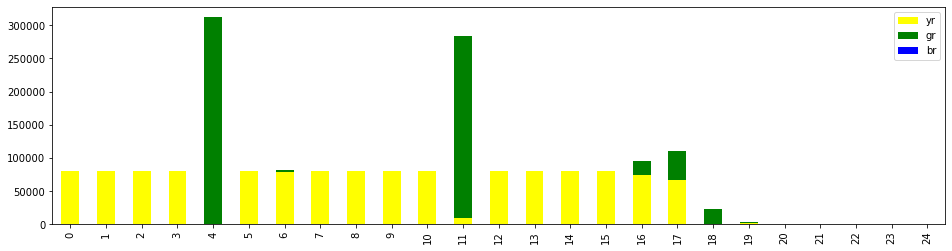

In [84]:
h=[0]*len(years)
sol85_y=[]
sol85_g=[]
sol85_b=[]

for t in range(len(years)):
    ye=0
    gr=0
    bl=0
    for i in roofs:
        ye=ye+xYR[t,i].X
        gr=gr+yGR[t,i].X*a[i]
        bl=bl+yBR[t,i].X*a[i]
        sol85_y.append(xYR[t,i].X)
        sol85_g.append(yGR[t,i].X)
        sol85_b.append(yBR[t,i].X)
        
    h[t]=([ye,gr,bl])
    
hh=pd.DataFrame(h, columns=['yr', 'gr', 'br'])
hh.plot.bar(stacked=True, color=['yellow','green','blue'], figsize=(16,4))


In [85]:
sol85_g=pd.DataFrame(sol85_g)
sol85_b=pd.DataFrame(sol85_b)
sol85_y=pd.DataFrame(sol85_y)
sol85=pd.concat([sol85_g, sol85_b, sol85_y])

In [86]:
sol85.to_csv('C:\\Users\\NLLIST\\Desktop\\Thesis\\try8\\rcp85ICmulti.csv')

## Exmple model run: rcp 2.6

In [38]:
try:
    # Create a new model called m
    m = Model("multiple_roofs")
    # Set the model to maximize
    #m.ModelSense = -1    

    ## Variables 
    xYR = m.addVars(len(years),len(a), name='yr')
    xGR = m.addVars(len(years),len(a), name='gr')
    xBR = m.addVars(len(years),len(a), name= 'br')

    #yYR = m.addVars(len(years),len(a), vtype=GRB.BINARY,name='bin_yr')
    yGR = m.addVars(len(years),len(a), vtype=GRB.BINARY,name='bin_gr')
    yBR = m.addVars(len(years),len(a), vtype=GRB.BINARY,name='bin_br')
   

    bYR = m.addVars(len(years),len(a), name='benefit_yr')
    bGR = m.addVars(len(years),len(a), name='benefit_gr')
    bBR = m.addVars(len(years),len(a), name='benefit_br')


    ## Constraints
    #area
    m.addConstrs((xGR[t,i] == a[i]*yGR[t,i] for i in roofs for t in range(len(years))),name='area_gr')
    m.addConstrs((xBR[t,i] == a[i]*yBR[t,i] for i in roofs for t in range(len(years))),name='area_br')
    m.addConstrs((xYR[t,i] <= a[i] for i in roofs for t in range(len(years))), name='area_yr')

    #budget
    m.addConstrs( (quicksum(sub*(pg*xGR[t,i] + py*xYR[t,i]+ pb*xBR[t,i]) for i in roofs) <= B[t] for t in range(len(years))), name='budget') 
    
    
    #technical choices
    m.addConstrs(yGR[t,i]>=yBR[t,i] for i in roofs for t in range(len(years)))
    #m.addConstrs(xYR[i]==0 for i in roofs) if only adaptation is needed
    m.addConstrs(quicksum(yGR[t,i] for t in range(len(years))) <=1 for i in roofs)
    m.addConstrs(quicksum(yBR[t,i] for t in range(len(years))) <=1 for i in roofs)
    m.addConstrs(quicksum(xYR[t,i] for t in range(len(years)))<= a[i] for i in roofs) 

    #benefits
    m.addConstrs( bGR[t,i] == quicksum(cg*m26[z][i][w] *rg[i] *yGR[t,i] for w in range(hlen26[t])  for z in range(t,len(years))) for t in range(len(years)) for i in roofs)
    m.addConstrs( bBR[t,i] == quicksum(cb26[i]*(kb*r26[z][j]*xBR[t,i]+kg*hg*xGR[t,i])*rb[i] for j in range(rlen26[t]) for z in range(t,len(years))) for t in range(len(years)) for i in roofs)
    m.addConstrs( bYR[t,i] == quicksum( cy* Q *sp26[0][z] * ry[i] *(1+theta*yGR[t,i])* xYR[t,i] for z in range(t,len(years)) ) for t in range(len(years)) for i in roofs)
    m.setObjective(quicksum(bGR[t,i] + bBR[t,i] + bYR[t,i] for i in roofs for t in range(len(years))), GRB.MAXIMIZE)
    m.update()
    m.optimize()

    # Here the solution is stored in such a way that the different combination of outcomes can be investigated


   # i_yr = [i for i in roofs if xYR[i].X > 0]
   # i_br = [i for i in roofs if yBR[i].X > 0]
   # i_gr = [i for i in roofs if yGR[i].X > 0]

   # pand.loc[i_yr, 'yr']=1
   # pand.loc[i_br, 'br']=1
  #  pand.loc[i_gr, 'gr']=1
    
    

    for v in m.getVars():
        print('%s %g' % (v.varName, v.x))

    print('Obj: %g' % m.objVal)
except GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')
    

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 137780 rows, 179200 columns and 384780 nonzeros
Model fingerprint: 0xe6ddd469
Model has 22400 quadratic constraints
Variable types: 134400 continuous, 44800 integer (44800 binary)
Coefficient statistics:
  Matrix range     [2e-05, 2e+05]
  QMatrix range    [3e-03, 5e+00]
  QLMatrix range   [5e-02, 9e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Found heuristic solution: objective -0.0000000
Presolve removed 90419 rows and 105405 columns
Presolve time: 0.70s
Presolved: 89869 rows, 84422 columns, 325290 nonzeros
Found heuristic solution: objective 529.7846477
Variable types: 45627 continuous, 38795 integer (38795 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.00s

Solved with dual simplex

Root relaxati

## Visualize solutions

<AxesSubplot:>

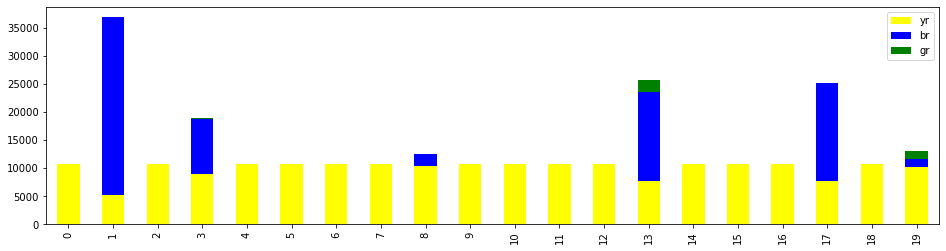

In [40]:
h=[0]*len(years)

for t in range(len(years)):
    ye=0
    gr=0
    bl=0
    for i in roofs:
        ye=ye+xYR[t,i].X
        gr=gr+xGR[t,i].X
        bl=bl+xBR[t,i].X
        
    h[t]=([ye,gr,bl])
    
hh2=pd.DataFrame(h, columns=['yr', 'br', 'gr'])
hh2.plot.bar(stacked=True, color=['yellow','blue','green'], figsize=(16,4))

<AxesSubplot:>

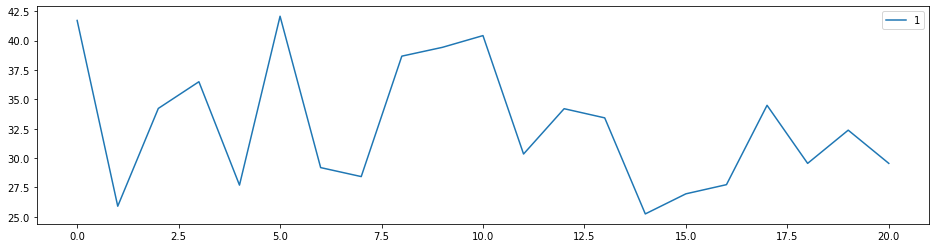

In [45]:
hr26.plot(figsize=(16,4))

<AxesSubplot:>

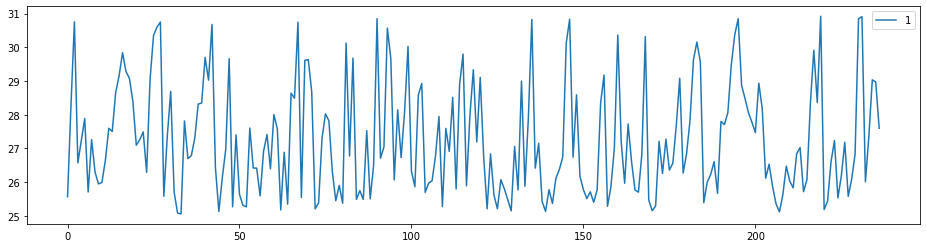

In [46]:
hw26.groupby('0').plot(figsize=(16,4))

In [36]:
hh2

yr            br           gr
0   10638.297872      0.000000     0.000000
1    5255.019523  31626.760304     0.000000
2   10638.297872      0.000000     0.000000
3    8965.674846   9709.677384   187.172634
4   10638.297872      0.000000     0.000000
5   10638.297872      0.000000     0.000000
6   10638.297872      0.000000     0.000000
7   10638.297872      0.000000     0.000000
8   10274.029851   2140.074624     0.000000
9   10638.297872      0.000000     0.000000
10  10638.297872      0.000000     0.000000
11  10638.297872      0.000000     0.000000
12  10638.297872      0.000000     0.000000
13   7723.082371  15741.717478  2216.277749
14  10638.297872      0.000000     0.000000
15  10638.297872      0.000000     0.000000
16  10638.297872      0.000000     0.000000
17   7658.911760  17503.893410     0.000000
18  10638.297872      0.000000     0.000000
19  10245.728190   1419.290390  1419.290390